### DBSCAN (Density-Based Spatial Clustering of Applications with Noise)

In [1]:
import pandas as pd
import geopandas as gpd
from shapely import wkt
from sklearn.cluster import DBSCAN
import numpy as np
import matplotlib.pyplot as plt

In [8]:
# Read Train data
RailStations = gpd.read_file('../data/cleaned/RailStationsMerged.geojson')

# Read Bus data
BusStops = gpd.read_file('../data/cleaned/BusStops.geojson')

rail_stations = RailStations.to_crs(epsg=3857)
bus_stops = BusStops.to_crs(epsg=3857)

/Users/kiley/Desktop/dsa4264-lta-geospatial/.venv/lib/python3.9/site-packages/geopandas/geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


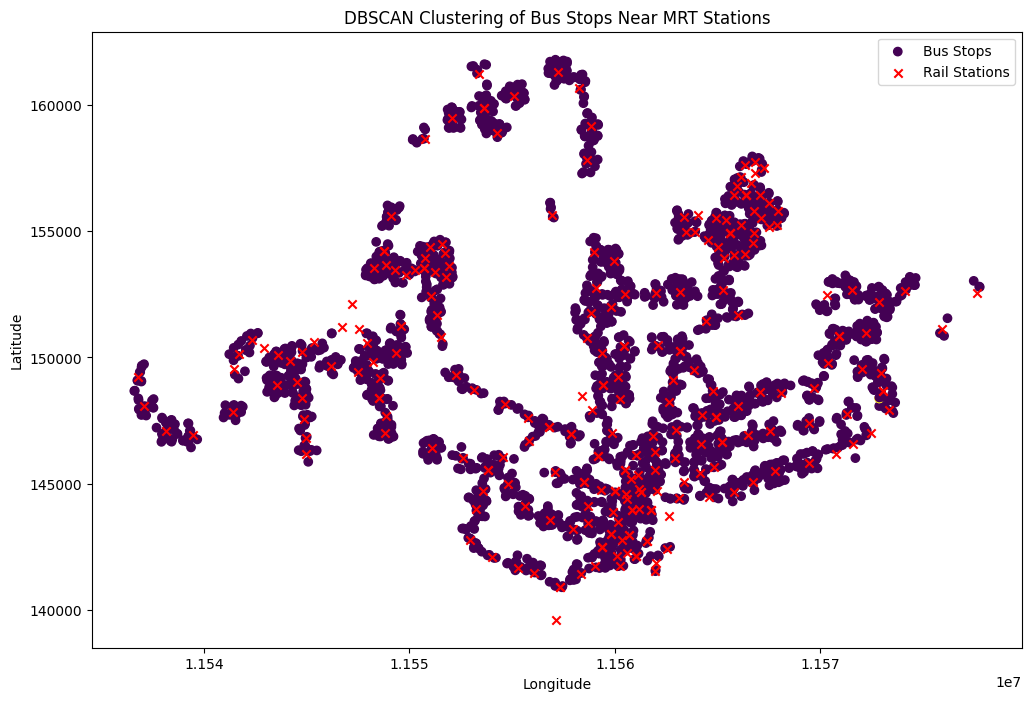

      BUS_STOP_N                  LOC_DESC  cluster  min_distance
0          65059              ST ANNE'S CH       -1    154.919861
3           1239              SULTAN PLAZA       -1    359.002023
6          11531  OPP LEA HIN HARDWARE FTY       -1    362.168391
7          46529         OPP MARSILING STN       -1     41.441101
9          71169               AZTECH BLDG       -1    224.151498
...          ...                       ...      ...           ...
5155       65109      MY FIRST SKOOL PCC10       -1    272.467692
5156       65101  OPP MY FIRST SKOOL PCC10       -1    232.044783
5157       63209       PARKWOOD RESIDENCES       -1    361.305765
5158       67621                BLK 278 CP       -1    291.992180
5165       58269            OPP VISIONAIRE       -1    322.707732

[2675 rows x 4 columns]


In [9]:
# Initialize a list to store the minimum distance from each bus stop to a rail station
bus_stops['min_distance'] = bus_stops['geometry'].apply(
    lambda bus_stop: rail_stations.geometry.distance(bus_stop).min()
)

# Filter bus stops within a certain threshold distance from rail stations (e.g., 500 meters)
threshold_distance = 500  # Adjust as needed
nearby_bus_stops = bus_stops[bus_stops['min_distance'] <= threshold_distance]

# Extract coordinates from the filtered bus stops
bus_coords = np.array(list(zip(nearby_bus_stops.geometry.x, nearby_bus_stops.geometry.y)))

# Apply DBSCAN clustering to the nearby bus stops
dbscan = DBSCAN(eps=0.005, min_samples=2)  # Adjust 'eps' based on your data's coordinate scale
bus_labels = dbscan.fit_predict(bus_coords)

# Assign cluster labels back to the DataFrame
nearby_bus_stops['cluster'] = bus_labels

# Plot the clusters along with rail stations
plt.figure(figsize=(12, 8))
plt.scatter(nearby_bus_stops.geometry.x, nearby_bus_stops.geometry.y, 
            c=nearby_bus_stops['cluster'], cmap='viridis', marker='o', label='Bus Stops')
plt.scatter(rail_stations.geometry.centroid.x, rail_stations.geometry.centroid.y, 
            c='red', marker='x', label='Rail Stations')
plt.title('DBSCAN Clustering of Bus Stops Near MRT Stations')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.show()

# Display bus stops with cluster assignments
print(nearby_bus_stops[['BUS_STOP_N', 'LOC_DESC', 'cluster', 'min_distance']])